<a href="https://colab.research.google.com/github/shubhamsorap/Mtech-DL-/blob/master/Exercise3_DL_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape((X_train.shape[0],32*32*3))
X_test = X_test.reshape((X_test.shape[0],32*32*3))
print(X_train.shape)
print(X_test.shape)
#normalise
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#categorical

y_test = to_categorical(y_test,10)
y_train = to_categorical(y_train,10)

Using TensorFlow backend.


170500096/170498071 [==============================] - 14s 0us/step
(50000, 3072)
(10000, 3072)


On Training Dataset

In [3]:
from keras.models import Sequential
from keras.layers import Dense

model_test2 = Sequential()
model_test2.add(Dense(units=10, activation='sigmoid', input_dim=3072))

#model_test2.add(Dense(units=1, activation='sigmoid'))
model_test2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_test2.fit(X_train,y_train,epochs=10,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 68us/step - loss: 0.3175 - accuracy: 0.8994 - val_loss: 0.3060 - val_accuracy: 0.8997
Epoch 2/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.3007 - accuracy: 0.8997 - val_loss: 0.2986 - val_accuracy: 0.8994
Epoch 3/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.2952 - accuracy: 0.8996 - val_loss: 0.2952 - val_accuracy: 0.8992
Epoch 4/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.2921 - accuracy: 0.8997 - val_loss: 0.2926 - val_accuracy: 0.8997
Epoch 5/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.2899 - accuracy: 0.8998 - val_loss: 0.2909 - val_accuracy: 0.8996
Epoch 6/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.2883 - accuracy: 0.9000 - val_loss: 0.2893 - val_accuracy: 0.9000
Epoch 7/10
40000/40000 [==============================] - 2s 59us/st

# using tf

In [11]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [15]:
model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10)
])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4822 - accuracy: 0.4604 - val_loss: 1.3114 - val_accuracy: 0.5239
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1357 - accuracy: 0.5993 - val_loss: 1.0480 - val_accuracy: 0.6286
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9910 - accuracy: 0.6508 - val_loss: 0.9500 - val_accuracy: 0.6701
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8921 - accuracy: 0.6857 - val_loss: 0.9321 - val_accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8169 - accuracy: 0.7143 - val_loss: 0.9120 - val_accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7508 - accuracy: 0.7369 - val_loss: 0.8737 - val_accuracy: 0.6994
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6930 - accuracy: 0.7568 - val_loss: 0.8706 -

313/313 - 3s - loss: 0.9024 - accuracy: 0.7114


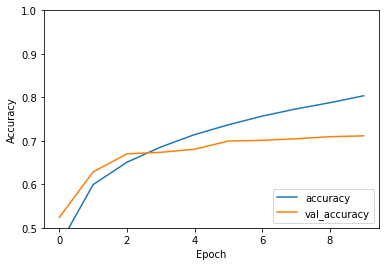

In [19]:
#accuracy plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)